In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textstat

Increase Accuracy By:
- Creating feature total_sentiment_analysis by analyzing the sentiment contained in each scentence - NLP on each scentence and using recurrent neural tensor networks (RNTNs) to determine each scentence sentiment.
- Creating feature toxic_comments_count (toxic+severe_toxic+obscene+threat+insult+identity_hate) - Kaggle Challenge

Consider:
- Scaling data
- KNN, Decision Trees, Support Vector Machines
- Feature Engineering for each
- PCA
- Model Evaluation
- HyperParameter Optimization for each
- K-Means, GMM, t-SNE clustering
- Neural Networks - recurrent neural tensor networks (RNTNs)

### Data Ingest, Check and Cleanup

In [126]:
df = pd.read_csv('labeled_amazon_reviews.txt', sep="\t")
df.columns = ["doc_id", "falsified", "rating", "verified_purchase", "product_category", "product_id", "product_title","review_title","review_text"]

In [127]:
df.head()

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [128]:
df.shape

(21000, 9)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   doc_id             21000 non-null  int64 
 1   falsified          21000 non-null  object
 2   rating             21000 non-null  int64 
 3   verified_purchase  21000 non-null  object
 4   product_category   21000 non-null  object
 5   product_id         21000 non-null  object
 6   product_title      21000 non-null  object
 7   review_title       21000 non-null  object
 8   review_text        21000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [130]:
# Check for NA's
def display_NA_counts(the_df):
    null_series = the_df.isna().sum(axis=0)
    display(null_series[null_series > 0])

In [131]:
display_NA_counts(df)

Series([], dtype: int64)

In [132]:
#Check for duplicated rows
df.duplicated().sum()*100.0/df.shape[0]

0.0

In [133]:
def get_verified_value(value):
    if value == 'Y':
        return 1
    else:
        return 0

In [134]:
df['verified_purchase'] = df['verified_purchase'].apply(get_verified_value)

In [135]:
df.head()

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text
0,1,__label1__,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,1,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,0,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,0,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,0,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [136]:
def get_label(value):
    if value == '__label1__':
        return 1
    else:
        return 0

In [137]:
df['falsified'] = df['falsified'].apply(get_label)

In [138]:
df.head()

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,1,4,1,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,1,3,0,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,1,4,0,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,1,4,0,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [139]:
def get_sentiment(value):
    if value > 3:
        return 1
    else:
        return 0

In [140]:
df['sentiment'] = df['rating'].apply(get_sentiment)

In [141]:
df.head()

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text,sentiment
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",1
1,2,1,4,1,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,1
2,3,1,3,0,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,0
3,4,1,4,0,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,1
4,5,1,4,0,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,1


In [142]:
#Removing ratings with rating = 3 ("On the fence")
# df = df.loc[:, ['review_body', 'star_rating']]
# df = df.query('star_rating != 3.0')
# df.head()

### Data EDA

5    12210
4     3973
3     1868
1     1757
2     1192
Name: rating, dtype: int64


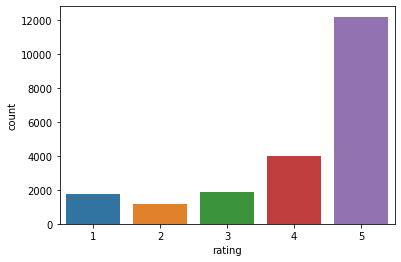

In [143]:
sns.countplot(x='rating', data=df)
print(df['rating'].value_counts())

1    10500
0    10500
Name: falsified, dtype: int64


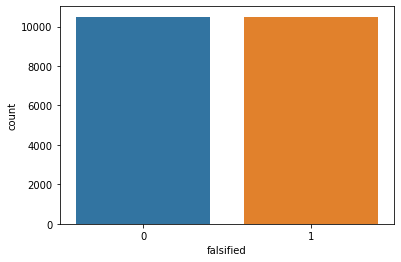

In [144]:
sns.countplot(x='falsified', data=df)
print(df['falsified'].value_counts())

In [145]:
# df.query('falsified == 1')

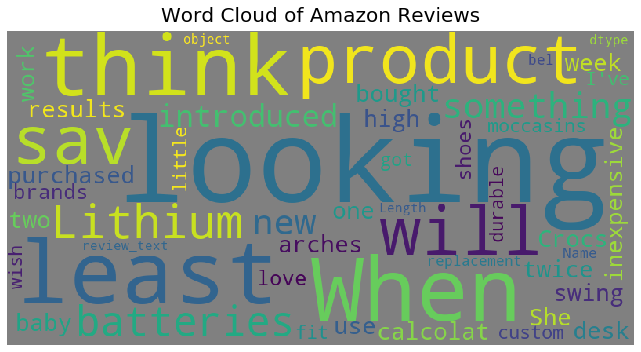

In [146]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=150, figure_size=(15.0,5.0), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='gray',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 50,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df['review_text'], title="Word Cloud of Amazon Reviews")

In [147]:
# Let's clean out any html (should it exist)
import bs4
df['review_text'] = df['review_text'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())

In [148]:
df.head()

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text,sentiment
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",1
1,2,1,4,1,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,1
2,3,1,3,0,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,0
3,4,1,4,0,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,1
4,5,1,4,0,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,1


In [149]:
df_clean = df

In [150]:
df = df_clean

### Feature Extraction

In [151]:
import string

## Number of words in the text ##
df["num_words_in_text"] = df["review_text"].apply(lambda x: len(str(x).split()))

## Number of stopwords in the text ##
df["num_stopwords"] = df["review_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of words in the text (not counting stopwords) ##
df["num_words_in_text_no_stop"] = df.apply(lambda x: x['num_words_in_text'] - x['num_stopwords'], axis=1)

## Number of unique words in the text ##
df["num_unique_words"] = df["review_text"].apply(lambda x: len(set(str(x).split())))

## Average length of the words in the text ##
df["mean_word_len"] = df["review_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

## Number of characters in the text ##
df["num_chars"] = df["review_text"].apply(lambda x: len(str(x)))

## Number of punctuations in the text ##
df["num_punctuations"] = df['review_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [152]:
## Number of Scentences ##
df["num_scentences_in_text"] = df["review_text"].apply(lambda x: textstat.sentence_count(x))

## Flesch Reading Ease Formula ##
df["flesch_ease"] = df["review_text"].apply(lambda x: textstat.flesch_reading_ease(x))

## Flesh-Kincaid Grade Level ##
df["flesch_kincaid_grade"] = df["review_text"].apply(lambda x: textstat.flesch_kincaid_grade(x))

## Automated Readability Index ##
df["automated_readability_index"] = df["review_text"].apply(lambda x: textstat.automated_readability_index(x))

## Overall Readability Index ##
df["overall_readability_index"] = df["review_text"].apply(lambda x: textstat.text_standard(x, float_output=True))

In [177]:
df.head(1)

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text,sentiment,...,num_words_in_text_no_stop,num_unique_words,mean_word_len,num_chars,num_punctuations,num_scentences_in_text,flesch_ease,flesch_kincaid_grade,automated_readability_index,overall_readability_index
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",1,...,12,21,4.09,116,3,2,102.10,1.90,3.60,5.00


In [178]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
doc_id,21000.00,10500.50,6062.32,1.00,5250.75,10500.50,15750.25,21000.00
falsified,21000.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00
rating,21000.00,4.13,1.28,1.00,4.00,5.00,5.00,5.00
verified_purchase,21000.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
sentiment,21000.00,0.77,0.42,0.00,1.00,1.00,1.00,1.00
num_words_in_text,21000.00,68.45,84.25,1.00,29.00,44.00,73.00,2805.00
num_stopwords,21000.00,34.00,40.97,0.00,14.00,23.00,37.00,1423.00
num_words_in_text_no_stop,21000.00,34.45,43.98,1.00,15.00,22.00,36.00,1382.00
num_unique_words,21000.00,51.27,46.06,1.00,26.00,38.00,57.00,992.00
mean_word_len,21000.00,4.35,0.73,3.09,4.06,4.30,4.58,64.00


In [209]:
## Truncate some extreme values for better visuals, think about balancing positive vs negative reviews ##
df_final = df.query('num_words_in_text <= 500 and num_punctuations < 300')

In [210]:
df_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
doc_id,20862.00,10488.65,6070.71,1.00,5226.25,10455.50,15754.75,21000.00
falsified,20862.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
rating,20862.00,4.13,1.28,1.00,4.00,5.00,5.00,5.00
verified_purchase,20862.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
sentiment,20862.00,0.77,0.42,0.00,1.00,1.00,1.00,1.00
num_words_in_text,20862.00,64.05,60.61,1.00,29.00,44.00,72.00,500.00
num_stopwords,20862.00,31.94,30.20,0.00,14.00,22.00,37.00,255.00
num_words_in_text_no_stop,20862.00,32.12,31.14,1.00,15.00,22.00,35.00,339.00
num_unique_words,20862.00,49.09,36.55,1.00,26.00,38.00,57.00,319.00
mean_word_len,20862.00,4.35,0.73,3.09,4.06,4.30,4.57,64.00


In [211]:
df_final.to_csv('df_final.csv');

In [109]:
# # Using recurrent neural tensor networks (RNTNs) to determine each scentence sentiment.
# # 𝑇𝑜𝑡𝑎𝑙 𝑆𝑒𝑛𝑡𝑖𝑚𝑒𝑛𝑡 = 1 ∗ (𝑉𝑒𝑟𝑦 𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒) + 2 ∗ (𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒) + 3 ∗ (𝑁𝑒𝑢𝑡𝑟𝑎𝑙) + 4 ∗ (𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒) + 5 ∗ (𝑉𝑒𝑟𝑦 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒)

# df_mini = df([['doc_id','review_body']])

# def get_total_sentiment(value):
#     if value > 3:
#         return 1
#     else:
#         return 0
    
# df['total_sentiment'] = df['review_text'].apply(get_sentiment)

### Corrolation Check and VIF Check

In [ ]:
df_numerical = df[['falsified','rating','verified_purchase','sentiment','num_words_in_text','num_stopwords',\
                  'num_words_in_text_no_stop', 'num_unique_words', 'mean_word_len','num_chars',\
                  'num_punctuations','num_scentences_in_text', 'flesch_ease', 'flesch_kincaid_grade',\
                  'automated_readability_index','overall_readability_index']]

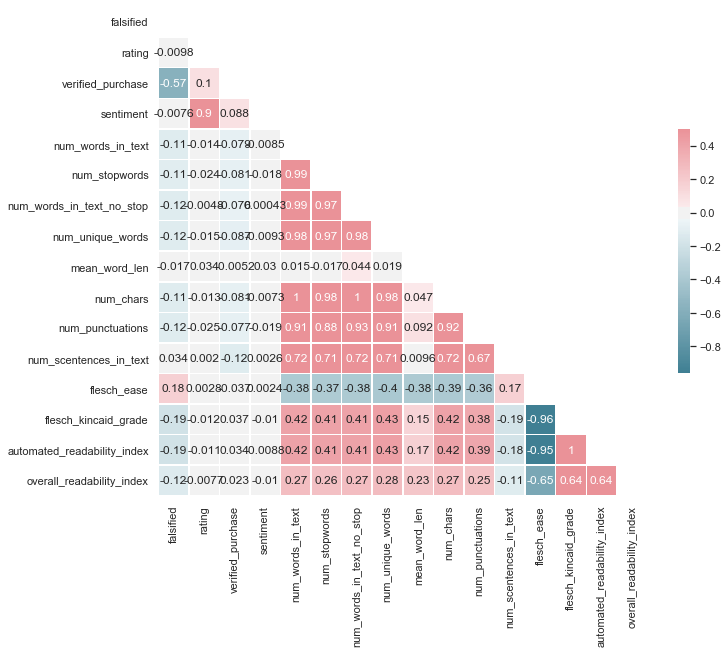

In [174]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df_numerical

sns.set(style="white")

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=corr)

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif_df_numerical = df_numerical

#Lets take a look at the Varience Inflation Factor on ONLY low corrolated columns
VIF = []

vif_df_numerical = vif_df_numerical.drop('num_words_in_text', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_stopwords', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_words_in_text_no_stop', axis=1)
vif_df_numerical = vif_df_numerical.drop('automated_readability_index', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_unique_words', axis=1)
vif_df_numerical = vif_df_numerical.drop('mean_word_len', axis=1)

for i in vif_df_numerical:
    X = vif_df_numerical[[
        'falsified',
        'rating',
        'verified_purchase',
        'sentiment',
        #'num_words_in_text',
        #'num_stopwords',
        #'num_words_in_text_no_stop', 
        #'num_unique_words', 
        #'mean_word_len',
        'num_chars',
        'num_punctuations',
        'num_scentences_in_text', 
        'flesch_ease', 
        'flesch_kincaid_grade',
        #'automated_readability_index',
        'overall_readability_index'
        ]]
    
    low_vif_df_numerical = X
    y = vif_df_numerical['sentiment']
    
    X_withconst = sm.add_constant(X)
    
    #Lets store our results
    VIF = pd.Series([variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])],index=X.columns)
    
    #Lets make a pretty table to show our results
    pd.options.display.float_format = '{:.2f}'.format
    
VIF_Frame = pd.DataFrame(VIF, columns=['VIF Value'])

VIF_Frame

,VIF Value
falsified,3.03
rating,51.63
verified_purchase,3.37
sentiment,21.27
num_chars,18.33
num_punctuations,10.15
num_scentences_in_text,9.28
flesch_ease,11.70
flesch_kincaid_grade,8.61
overall_readability_index,2.91


### Preliminary Modeling

In [154]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [166]:
print(df.columns)

Index(['doc_id', 'falsified', 'rating', 'verified_purchase',
       'product_category', 'product_id', 'product_title', 'review_title',
       'review_text', 'sentiment', 'num_words_in_text', 'num_stopwords',
       'num_words_in_text_no_stop', 'num_unique_words', 'mean_word_len',
       'num_chars', 'num_punctuations', 'num_scentences_in_text',
       'flesch_ease', 'flesch_kincaid_grade', 'automated_readability_index',
       'overall_readability_index'],
      dtype='object')


In [206]:
y = low_vif_df_numerical['falsified']
X = low_vif_df_numerical.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(y.shape)
print(X.shape)

(21000,)
(21000, 9)


In [207]:
X_withconstant = sm.add_constant(X)

my_logit_results = sm.Logit(y, X_withconstant).fit()
my_logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.480207
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              falsified   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20990
Method:                           MLE   Df Model:                            9
Date:                Thu, 18 Jun 2020   Pseudo R-squ.:                  0.3072
Time:                        17:44:13   Log-Likelihood:                -10084.
converged:                       True   LL-Null:                       -14556.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.2242      0.203     10.978      0.000       1.827       2.621
rating                        0.1071      0.032      3.339      0.001       0.044       0.170
verified_purchase            -2.9009      0.039    -75.178      0.000      -2.976      -2.825
sentiment                     0.0079      0.098      0.081      0.936      -0.185       0.201
num_chars                    -0.0008      0.000     -4.771      0.000      -0.001      -0.000
num_punctuations             -0.0311      0.004     -8.291      0.000      -0.038      -0.024
num_scentences_in_text        0.1060      0.014      7.598      0.000       0.079       0.133
flesch_ease                  -0.0051      0.002     -2.943      0.003      -0.009      -0.002
flesch_kincaid_grade         -0.0396      0.006     -6.356      0.000      -0.052      -0.027
overall_readability_index    -0.0023      0.004     -0.644      0.520      -0.009       0.005
=============================================================================================
"""

### Class Imbalance + Downsampled DF

1    16183
0     4817
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment Counts')

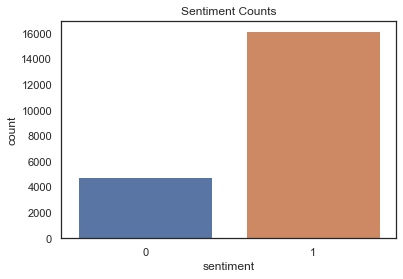

In [212]:
print(low_vif_df_numerical['sentiment'].value_counts())
sns.countplot(x='sentiment', data=low_vif_df_numerical)
plt.title("Sentiment Counts")

In [213]:
from sklearn.utils import resample

positive = low_vif_df_numerical[low_vif_df_numerical['sentiment']==1]
negative = low_vif_df_numerical[low_vif_df_numerical['sentiment']==0]

positive_downsampled = resample(positive,
                                replace = False, # sample without replacement
                                n_samples = len(negative), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([positive_downsampled, negative])

df_downsampled = downsampled

1    4817
0    4817
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment Counts')

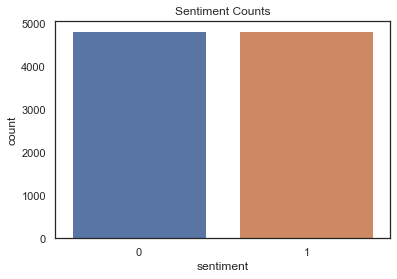

In [214]:
print(df_downsampled['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df_downsampled)
plt.title("Sentiment Counts")

### Data Modeling

In [215]:
y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(y.shape)
print(X.shape)

(9634,)
(9634, 9)


In [216]:
X_withconstant = sm.add_constant(X)

my_logit_results = sm.Logit(y, X_withconstant).fit()
my_logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.455782
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              falsified   No. Observations:                 9634
Model:                          Logit   Df Residuals:                     9624
Method:                           MLE   Df Model:                            9
Date:                Thu, 18 Jun 2020   Pseudo R-squ.:                  0.3424
Time:                        17:52:04   Log-Likelihood:                -4391.0
converged:                       True   LL-Null:                       -6677.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.8502      0.397      7.184      0.000       2.073       3.628
rating                       -0.0192      0.040     -0.481      0.630      -0.097       0.059
verified_purchase            -3.1065      0.058    -53.703      0.000      -3.220      -2.993
sentiment                     0.3838      0.124      3.103      0.002       0.141       0.626
num_chars                    -0.0006      0.000     -2.415      0.016      -0.001      -0.000
num_punctuations             -0.0256      0.005     -4.706      0.000      -0.036      -0.015
num_scentences_in_text        0.0544      0.021      2.642      0.008       0.014       0.095
flesch_ease                  -0.0064      0.004     -1.663      0.096      -0.014       0.001
flesch_kincaid_grade         -0.0482      0.012     -4.126      0.000      -0.071      -0.025
overall_readability_index    -0.0085      0.006     -1.532      0.126      -0.019       0.002
=============================================================================================
"""

In [217]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [235]:
# tSNE with two components
X = df_downsampled
y = df_downsampled['falsified']

# We need to scale the data since tSNE is also distance based
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

my_tSNE = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

X_tSNE = my_tSNE.fit_transform(X_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9634 samples in 0.007s...
[t-SNE] Computed neighbors for 9634 samples in 0.784s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9634
[t-SNE] Computed conditional probabilities for sample 2000 / 9634
[t-SNE] Computed conditional probabilities for sample 3000 / 9634
[t-SNE] Computed conditional probabilities for sample 4000 / 9634
[t-SNE] Computed conditional probabilities for sample 5000 / 9634
[t-SNE] Computed conditional probabilities for sample 6000 / 9634
[t-SNE] Computed conditional probabilities for sample 7000 / 9634
[t-SNE] Computed conditional probabilities for sample 8000 / 9634
[t-SNE] Computed conditional probabilities for sample 9000 / 9634
[t-SNE] Computed conditional probabilities for sample 9634 / 9634
[t-SNE] Mean sigma: 0.226773
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.599434
[t-SNE] KL divergence after 300 iterations: 2.067081


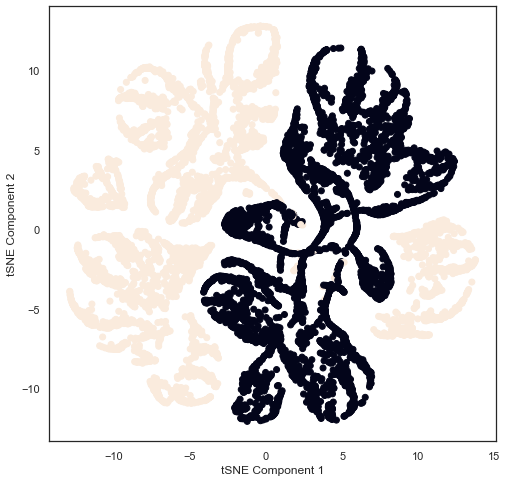

In [236]:
# Plotting the tSNE-transformed data (only the first two dimensions)
plt.figure(figsize=(8, 8))
plt.scatter(X_tSNE[:,0],X_tSNE[:,1],c=y)

plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")

plt.show()

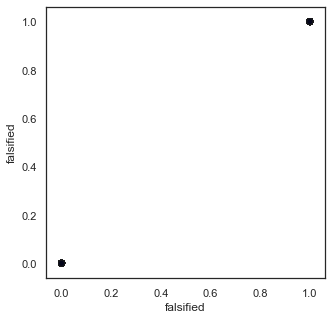

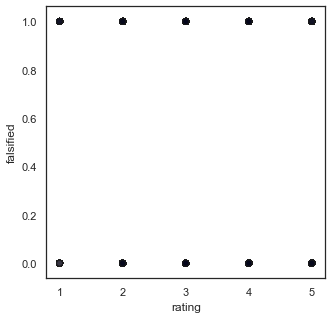

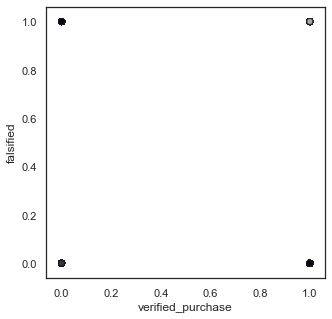

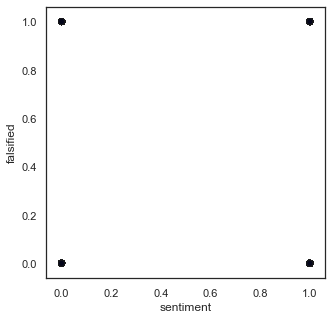

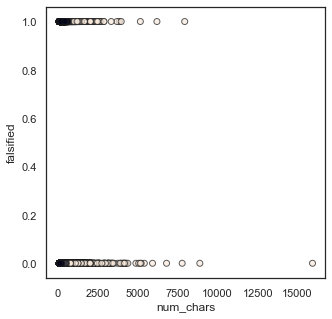

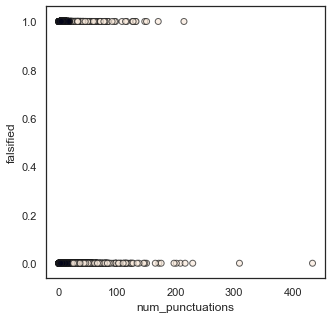

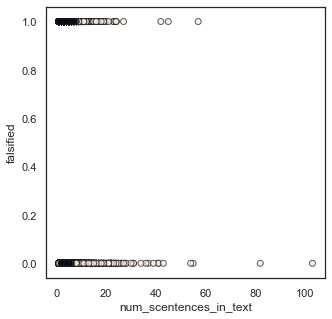

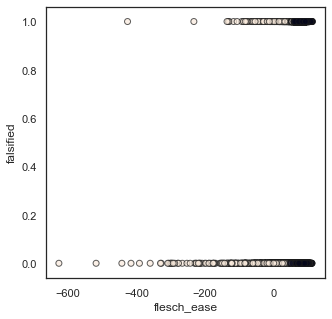

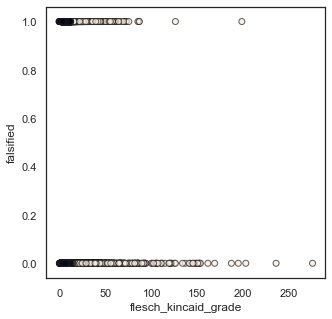

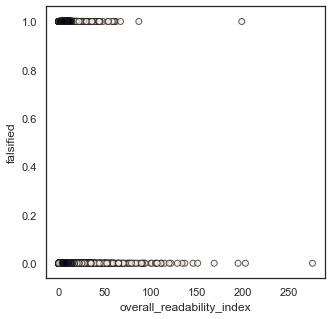

In [239]:
from sklearn.mixture import GaussianMixture

X = df_downsampled
y = df_downsampled['falsified']

#Build and fit the model
my_gmm = GaussianMixture(n_components=2, covariance_type='full')
my_gmm.fit(X)

#Getting the labels
pred_labels_gmm = my_gmm.predict(X)

for column in df_downsampled:
    #Plot the predictions
    plt.figure(figsize=[5,5])
    plt.scatter(x = df_downsampled[column],
                y = df_downsampled['falsified'],
                c=pred_labels_gmm, 
                edgecolor='k',
                alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('falsified')
    plt.show();

In [189]:
from sklearn.tree import DecisionTreeClassifier

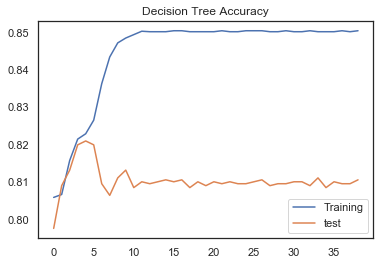

In [190]:
training_scores = []
test_scores = []

for i in range(1,40):
    # Instantiate & fit the DT
    DT_model = DecisionTreeClassifier(max_depth=i, max_leaf_nodes=100)
    DT_model.fit(X_train, y_train)
    
    training_scores.append(DT_model.score(X_train, y_train))
    test_scores.append(DT_model.score(X_test, y_test))

plt.figure()
plt.title('Decision Tree Accuracy')
plt.plot(training_scores)
plt.plot(test_scores)
plt.legend(['Training', 'test'])

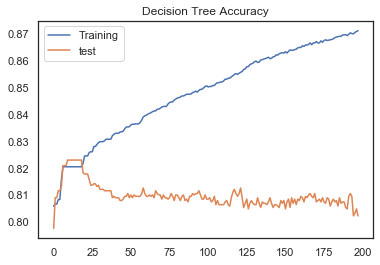

In [191]:
training_scores = []
test_scores = []

for i in range(2,200):
    # Instantiate & fit the DT
    DT_model = DecisionTreeClassifier(max_depth=19, max_leaf_nodes=i)
    DT_model.fit(X_train, y_train)
    
    training_scores.append(DT_model.score(X_train, y_train))
    test_scores.append(DT_model.score(X_test, y_test))

plt.figure()
plt.title('Decision Tree Accuracy')
plt.plot(training_scores)
plt.plot(test_scores)
plt.legend(['Training', 'test'])

In [192]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes=20)
DT_model.fit(X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 0.8214610094719087
DT test set accuracy: 0.8199273482096523
